In [35]:
!git clone https://github.com/dandedj/tucker_classifier.git

Cloning into 'tucker_classifier'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 178 (delta 0), reused 36 (delta 0), pack-reused 139
Receiving objects: 100% (178/178), 313.23 MiB | 47.79 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [33]:
!git -C ./tucker_classifier/ pull origin main

fatal: not a git repository (or any parent up to mount point /kaggle)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [5]:
from fastai.vision.all import *
from fastai.vision import *
from fastdownload import download_url
from duckduckgo_search import ddg_images
from fastcore.all import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 46.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: aiofiles
    Found existing installation: aiofiles 22.1.0
    Uninstalling aiofiles-22.1.0:
      Successfully uninstalled aiofiles-22.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ypy-websocket 0.8.4 requires aiofiles<23,>=22.1.0, but you have aiofiles 23.2.1 which is incompatible.


In [36]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

# download dogs from the internet
searches = ['dog']
path = Path('./tucker_classifier/images/train/not_tucker')
from time import sleep

for o in searches:
    dest = (path)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'dog photo'
Searching for 'dog sun photo'
Searching for 'dog shade photo'


In [37]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#2) [None,None]

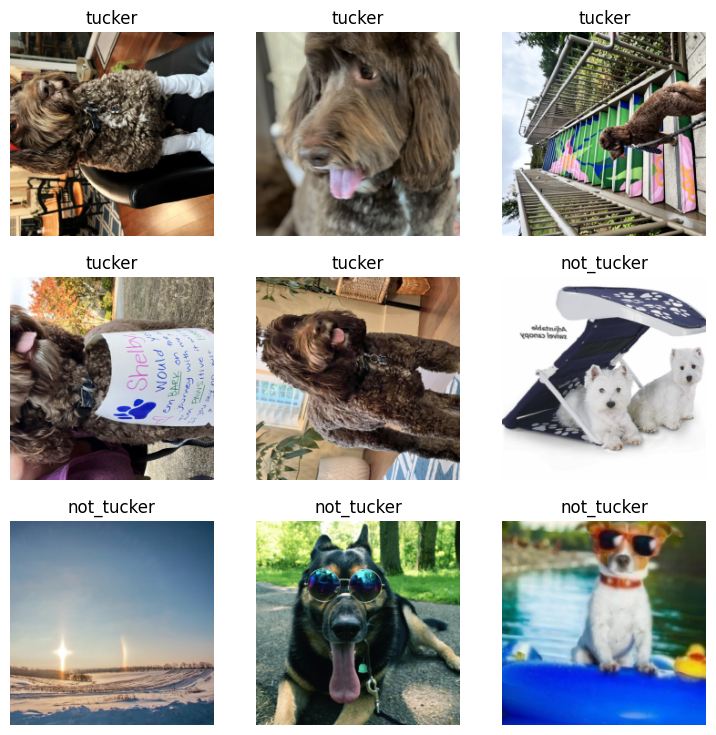

In [38]:
data = ImageDataLoaders.from_folder('./tucker_classifier/images/train', train=".", valid_pct=0.2, item_tfms=Resize(460), bs=10, batch_tfms=aug_transforms(size=224))

data.show_batch()

In [39]:
from fastai.vision.all import *

learn = vision_learner(data, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.610485,0.062462,0.029412,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.199271,0.061030,0.029412,00:16
1,0.141388,0.011125,0.000000,00:17
2,0.117363,0.024382,0.000000,00:16
3,0.131424,0.012299,0.000000,00:16
4,0.209109,0.005444,0.000000,00:17


This is a: tucker.
Probability: 0.0000


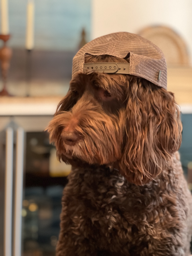

In [47]:
image_path = './tucker_classifier/images/unused/IMG_4239.HEIC.jpg'
# image_path = './tucker_classifier/images/train/tucker/D38A3E0C-C34D-4A75-89F6-CD5F2FA4449E.jpg'
# image_path = './tucker_classifier/images/train/not_tucker/0669ee47-2d10-496f-865d-0ef6768fc32d.jpg'

is_tucker,_,probs = learn.predict(PILImage.create(image_path))

print(f"This is a: {is_tucker}.")
print(f"Probability: {probs[0]:.4f}")
Image.open(image_path).to_thumb(256,256)